In [1]:
! which python

/Users/no_lineal/opt/anaconda3/envs/grid38/bin/python


In [2]:
import numpy as np

from polygon import get_polygon

from tqdm import tqdm

import scores

import os

import warnings
warnings.filterwarnings('ignore')

# viz
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
""" 

    where am i?

"""

PATH = os.getcwd()
data_path = PATH.replace( '01_square_156_256', '' ) + 'data/01_square/01_square_1000000_156_256/'

print( f'PATH: { PATH }' )
print( f'data_path: { data_path }' )

PATH: /Users/no_lineal/Documents/draft_code/grid_metrics/01_square_156_256
data_path: /Users/no_lineal/Documents/draft_code/grid_metrics/data/01_square/01_square_1000000_156_256/


In [4]:
"""  

    load ratemap

"""

ratemap = np.load( data_path + 'grid_scores/' + 'ratemap.npy' )

print( f'ratemap.shape: { ratemap.shape }' )

ratemap.shape: (512, 32, 32)


---------- computing sac maximum mask ----------


100%|██████████| 512/512 [00:18<00:00, 28.09it/s]


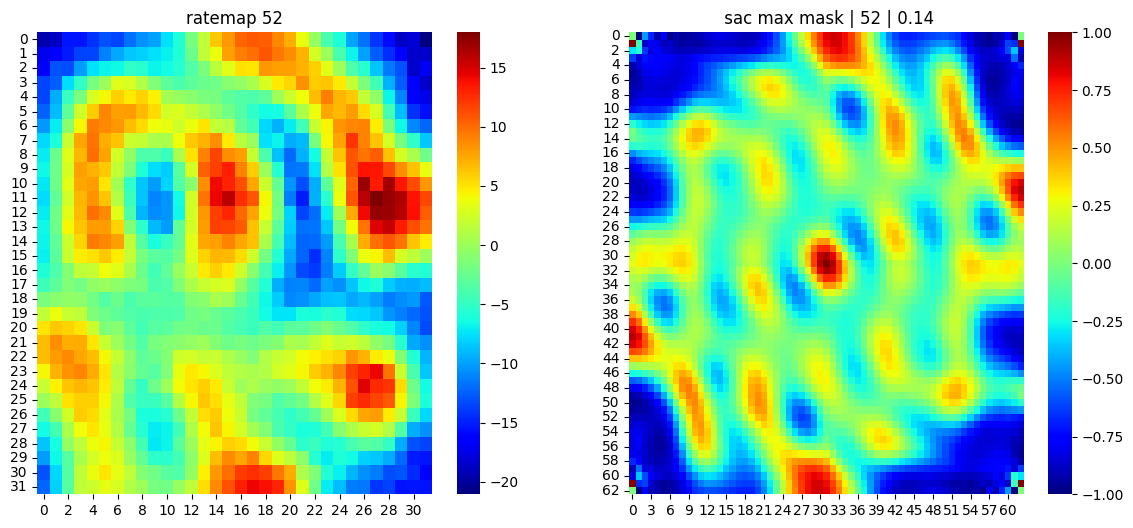

In [5]:
""" 

    grid scores dataset

"""

save = True

polygon_ = get_polygon( 'square', area=1.56**2, factor=1 )

res_ = 32

# coord range
min_x, min_y, max_x, max_y = polygon_.bounds
coord_range = ( (min_x, max_x), (min_y, max_y) )

s = ratemap

sample_idx = np.random.randint(0, len(s))

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap( s[ sample_idx ], ax=ax[0], cmap='jet' )
ax[0].set_title( f'ratemap { sample_idx }' )

# only max mask
print( '---------- computing sac maximum mask ----------' )

starts = [0.2] * 10
ends = np.linspace(0.4, 1.0, num=10)
masks_parameters = zip(starts, ends.tolist())

latest_epoch_scorer = scores.GridScorer( res_, coord_range, masks_parameters )

score_60, score_90, max_60_mask, max_90_mask, sac = zip( * [ latest_epoch_scorer.get_scores(rate_map, algorithm='sac') for rate_map in tqdm(s) ] )

if save:

    np.save( data_path + 'grid_scores/sac/max/' + 'score_60.npy', score_60 )
    np.save( data_path + 'grid_scores/sac/max/' + 'score_90.npy', score_90 )
    np.save( data_path + 'grid_scores/sac/max/' + 'max_60_mask.npy', max_60_mask )
    np.save( data_path + 'grid_scores/sac/max/' + 'max_90_mask.npy', max_90_mask )
    np.save( data_path + 'grid_scores/sac/max/' + 'sac.npy', sac )

sns.heatmap( sac[ sample_idx ], ax=ax[1], cmap='jet' )
ax[1].set_title( f' sac max mask | { sample_idx } | { round(score_60[ sample_idx ], 2) }' )

plt.show()